## Подключаем библиотеки

In [1]:
import os
import numpy as np
import scipy
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Загружаем данные

In [2]:
DATA_DIR = 'data'
FILE_NAME = 'iris.data.csv'

file_path = os.path.join(DATA_DIR, FILE_NAME)
df = pd.read_csv(file_path, names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

In [3]:
X = df[['sepal length', 'petal length']].values[0:100]

y = np.where(df[['class']].values[0:100] == 'Iris-setosa', -1, 1).reshape(-1)

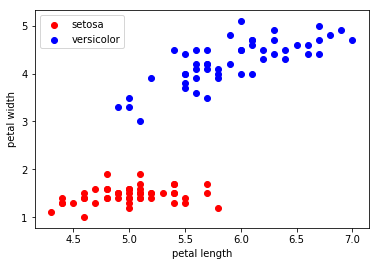

In [4]:

plt.scatter(X[:50, 0], X[:50, 1], color='red', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

## Стандартизация данных

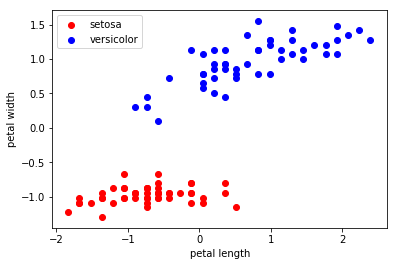

In [5]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

plt.scatter(X_std[:50, 0], X_std[:50, 1], color='red', label='setosa')
plt.scatter(X_std[50:100, 0], X_std[50:100, 1], color='blue', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

## Реализация

In [6]:
class AdalineGD(object):
    
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.n_iter = epochs
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
       return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
       return self.net_input(X)

    def predict(self, X):
       return np.where(self.activation(X) >= 0.0, 1, -1)

## Подбор коэффициента обучения α

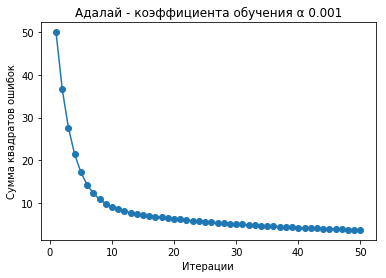

In [7]:
ada1 = AdalineGD(eta=0.001).fit(X_std,y)

plt.plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
plt.xlabel('Итерации')
plt.ylabel('Сумма квадратов ошибок')
plt.title('Адалай - коэффициента обучения α 0.001')
plt.show()

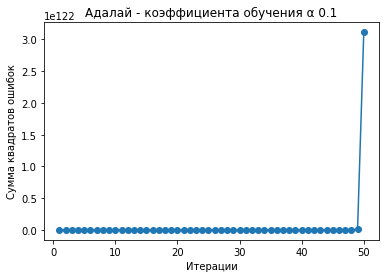

In [8]:
ada2 = AdalineGD(eta=0.1).fit(X_std,y)

plt.plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
plt.xlabel('Итерации')
plt.ylabel('Сумма квадратов ошибок')
plt.title('Адалай - коэффициента обучения α 0.1')
plt.show()

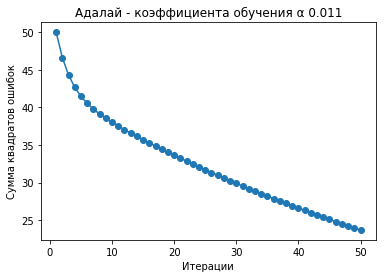

In [9]:
ada3 = AdalineGD(eta=0.011).fit(X_std,y)

plt.plot(range(1, len(ada3.cost_) + 1), ada3.cost_, marker='o')
plt.xlabel('Итерации')
plt.ylabel('Сумма квадратов ошибок')
plt.title('Адалай - коэффициента обучения α 0.011')
plt.show()

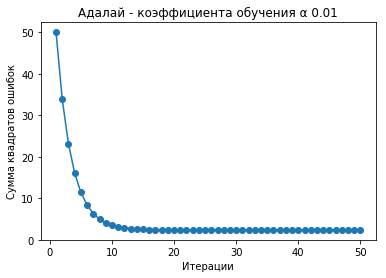

In [10]:
ada4 = AdalineGD(eta=0.01).fit(X_std,y)

plt.plot(range(1, len(ada4.cost_) + 1), ada4.cost_, marker='o')
plt.xlabel('Итерации')
plt.ylabel('Сумма квадратов ошибок')
plt.title('Адалай - коэффициента обучения α 0.01')
plt.show()

## Разделим наши данные на обучающие и тестовые данные (80:20)

In [11]:
X_train_std, X_test_std, y_train, y_test = train_test_split(X_std, y, test_size=0.2)

## Подсчет доли верно определенных классов в тестовой выборке

In [12]:
ada = AdalineGD(eta=0.01).fit(X_train_std, y_train)

y_pred = ada.predict(X_test_std)

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 1.00
